In [530]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# --------------------          PART 1          --------------------
# What is the size of the dataset?

<u>Answer:</u> 
    
The San Francisco Bikeshare database contains 3 tables;  
**bikeshare_stations**:  74 rows,  
**bikeshare_status**: 107,501,619 rows,   
**bikeshare_trips**: 983,648 rows.  

In [ ]:
SELECT COUNT (station_id) AS total_stations
FROM `bigquery-public-data.san_francisco.bikeshare_stations`


In [ ]:
SELECT COUNT (bikes_available) AS total_bike_status
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE bikes_available IS NOT NULL;

## What is the the earliest start date and time and the latest end date and time for a trip?

<u>Answer</u>:

**Earliest start:** August 29, 2013 @9:08am UTC  
**Latest start**: August 31, 2016 @11:32pm UTC

## How many bikes are there? 

<u>Answer:</u>  
There are **883,964,663** bikes

SELECT SUM(bikes_available) AS total_bikes
FROM `bigquery-public-data.san_francisco.bikeshare_status`;


### Question 1: What are the top 3 zip codes that show up most in the bikeshare_trips table?

<u>Answer:</u>  
    **Most**: 94107  (106,913 entries)  
    **Second**: 94105  (61,232 entries)  
    **Third**: 94133  (46,544 entries)

In [493]:
#BQ CLI Code

In [494]:
%%bigquery

SELECT zip_code, COUNT(zip_code) AS total 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY zip_code
ORDER BY total DESC 
LIMIT 3;

Downloading: 100%|██████████| 3/3 [00:00<00:00,  3.37rows/s]


,zip_code,total
0,94107,106913
1,94105,61232
2,94133,46544


### Question 2: What is the average trip_duration for subscribers and customers?

Answer:  
        1. The average trip duration for customers is approximately **61 minutes**  
        2. The average subscriber trip duration is approximately **9.7 minutes**

In [495]:
%%bigquery

SELECT 
    subscriber_type, COUNT(subscriber_type) AS total_trips, AVG(duration_sec/60) AS avg_trip_minutes
FROM 
`bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE 
    duration_sec IS NOT NULL 
GROUP BY 
    subscriber_type;    

Downloading: 100%|██████████| 2/2 [00:00<00:00,  2.33rows/s]


,subscriber_type,total_trips,avg_trip_minutes
0,Customer,136809,61.979753
1,Subscriber,846839,9.712737


### Question 3: What's the most number of trips for 1 bike?


<u>Answer:</u>   
    **2872 trips**

In [ ]:
%%bigquery

SELECT 
    bike_number, 
    COUNT(bike_number) AS total_trips,
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY bike_number
ORDER BY total_trips DESC
LIMIT 3;

#           --------------------           PART II          --------------------

### Whats the Size of the dataset?

<u>Answer:</u>  
**bikeshare_station**: 74 entries  
**bikeshare_status**:  107,501,619 entries  
**bikeshare_trips**:  983,648 entries


In [496]:
!bq query --use_legacy_sql=false 'SELECT COUNT (station_id) AS total_bikeshare_station_entries FROM `bigquery-public-data.san_francisco.bikeshare_stations`'

Waiting on bqjob_r113fa41dee6c31e_0000017c4f5a4345_1 ... (0s) Current status: DONE   
+---------------------------------+
| total_bikeshare_station_entries |
+---------------------------------+
|                              74 |
+---------------------------------+


In [497]:
!bq query --use_legacy_sql=false 'SELECT COUNT (bikes_available) AS total_bike_status_entries FROM `bigquery-public-data.san_francisco.bikeshare_status`'

Waiting on bqjob_r7d4b0aa72ce75c5b_0000017c4f5a4f05_1 ... (0s) Current status: DONE   
+---------------------------+
| total_bike_status_entries |
+---------------------------+
|                 107501619 |
+---------------------------+


In [498]:
!bq query --use_legacy_sql=false 'SELECT COUNT (trip_id) AS total_bikeshare_trip_entries FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r19044188e287f3aa_0000017c4f5a5b94_1 ... (0s) Current status: DONE   
+------------------------------+
| total_bikeshare_trip_entries |
+------------------------------+
|                       983648 |
+------------------------------+


### What is the earliest start time and latest end time for a trip?**

<u>Answer:</u>  
**earliest start date**: August 29, 2013 @ 9:08am  
**latest end date**: August 31, 2016 @ 11:38pm

In [499]:
!bq query --use_legacy_sql=false 'SELECT start_date AS earliest_start_date FROM `bigquery-public-data.san_francisco.bikeshare_trips`ORDER BY start_date ASC LIMIT 1' 

Waiting on bqjob_r330c1b3890a3f39f_0000017c4f5a6740_1 ... (0s) Current status: DONE   
+---------------------+
| earliest_start_date |
+---------------------+
| 2013-08-29 09:08:00 |
+---------------------+


In [500]:
!bq query --use_legacy_sql=false 'SELECT end_date AS latest_end_date FROM `bigquery-public-data.san_francisco.bikeshare_trips` ORDER BY start_date DESC LIMIT 1' 

Waiting on bqjob_r619985a9a783078d_0000017c4f5a7306_1 ... (0s) Current status: DONE   
+---------------------+
|   latest_end_date   |
+---------------------+
| 2016-08-31 23:38:00 |
+---------------------+


### How many Bikes are there? 

<u>Answer:</u>  
There are **883,964,663**


In [501]:
!bq query --use_legacy_sql=false 'SELECT SUM(bikes_available) AS total_bikes FROM `bigquery-public-data.san_francisco.bikeshare_status`'

Waiting on bqjob_r7941c2a8fdf94892_0000017c4f5a7fa3_1 ... (0s) Current status: DONE   
+-------------+
| total_bikes |
+-------------+
|   883964663 |
+-------------+


### How many trips are in the morning vs in the afternoon?  
(*assumption 1: morning is between 24:01 and 12:00  and afternoon is between 12:01 and 24:00*)

<u>Answer:</u>  
**Morning: 412,339**  
**Afternoon: 571,309**  
More than half of the trips recorded in this dataset represents trips between 12pm and 11:59pm.

In [502]:
!bq query --use_legacy_sql=false 'SELECT COUNT(start_date) AS trip_total, CASE WHEN hr >= 0 AND hr < 12 THEN "morning" WHEN hr >= 12 AND hr < 24 THEN "afternoon" END AS day_part FROM `bigquery-public-data.san_francisco.bikeshare_trips`, UNNEST ([EXTRACT(HOUR FROM DATETIME(start_date))]) AS hr GROUP BY day_part;'

Waiting on bqjob_r474ef2f6cc81ecf4_0000017c4f5a8aff_1 ... (0s) Current status: DONE   
+------------+-----------+
| trip_total | day_part  |
+------------+-----------+
|     571309 | afternoon |
|     412339 | morning   |
+------------+-----------+


## PROJECT QUESTIONS

1. What is the distribution of customers and subscribers on weekends vs weekdays?
2. Between customers and subscribers, who make up the majority of trips on weekdays?
2. What station has the least recorded customers and subscribers? 
3. what is the frequency of trips during common rush hour traffic times? (5am-9am, 3pm-7pm including weekends)
4. What is the monthly distribution of customers and subscribers?


## Q1: How many customers for for each day of week?

<u>Answer</u>:  

Sunday (1) = 51,375 trips  
Monday (2) = 169,937 trips  
Tuesday (3) = 184,405 trips    
Wednesday (4) = 180,767 trips  
Thursday (5) = 176,908 trips  
Friday (6) = 159,977 trips  
Saturday (7) = 60,279 trips  



In [503]:
! bq query --use_legacy_sql=FALSE 'SELECT  day_of_week, COUNT(*) AS total_trips, FROM (SELECT start_date, EXTRACT(DAYOFWEEK FROM start_date) AS day_of_week FROM 'bigquery-public-data.san_francisco.bikeshare_trips') GROUP BY day_of_week ORDER BY day_of_week'

Waiting on bqjob_r2b70bba9751f81a3_0000017c4f5a9704_1 ... (0s) Current status: DONE   
+-------------+-------------+
| day_of_week | total_trips |
+-------------+-------------+
|           1 |       51375 |
|           2 |      169937 |
|           3 |      184405 |
|           4 |      180767 |
|           5 |      176908 |
|           6 |      159977 |
|           7 |       60279 |
+-------------+-------------+


## Q2: Between customers and subscribers, who make up the majority of trips on weekdays?

<u>Answer</u>:  
Based on the querey, you can see that the majority of subscribers take trips between days 2- 6 (Mon-Fri)  

Sunday (1) = [Customer: 25,908] , [Subscriber: 25,467]  
**Monday (2) = [Customer:154,795], [Subscriber:15,142]   
Tuesday (3) =  [Customer:14,737],[Subscriber:169,668]    
Wednesday (4) =   [Customer:165,530],[Subscriber:15,237]  
Thursday (5) =   [Customer:16,612],[Subscriber:160,296]  
Friday (6) =  [Customer:19,929],[Subscriber:140,048]**  
Saturday (7) =   [Customer:31,035],[Subscriber:29,244]

In [504]:
! bq query --use_legacy_sql=FALSE 'SELECT  subscriber_type, day_of_week, COUNT(*) AS total_trips, FROM (SELECT subscriber_type, start_date, EXTRACT(DAYOFWEEK FROM start_date) AS day_of_week FROM 'bigquery-public-data.san_francisco.bikeshare_trips') GROUP BY subscriber_type, day_of_week ORDER BY day_of_week'

Waiting on bqjob_r48a1611cdc958b68_0000017c4f5a9e4f_1 ... (0s) Current status: DONE   
+-----------------+-------------+-------------+
| subscriber_type | day_of_week | total_trips |
+-----------------+-------------+-------------+
| Customer        |           1 |       25908 |
| Subscriber      |           1 |       25467 |
| Subscriber      |           2 |      154795 |
| Customer        |           2 |       15142 |
| Customer        |           3 |       14737 |
| Subscriber      |           3 |      169668 |
| Subscriber      |           4 |      165530 |
| Customer        |           4 |       15237 |
| Customer        |           5 |       16612 |
| Subscriber      |           5 |      160296 |
| Customer        |           6 |       19929 |
| Subscriber      |           6 |      140048 |
| Subscriber      |           7 |       31035 |
| Customer        |           7 |       29244 |
+-----------------+-------------+-------------+


### Q2: what is the frequency of trips during common rush hour traffic times? (5am-9am, 3pm-7pm including weekends)

_Note: 5am-9am = "morning_rush", & 3pm-7pm = "afternoon_rush"_

<u>Answer:</u>
There are **347,252** trips taken during the afternoon rush hour, and **225612** trips taken during the morning rush hour as compared to **410,784** trips during non-rush hour traffic.

In [1]:
%%bigquery

SELECT COUNT(*) AS trip_total,
 CASE
   WHEN hr >= 5 AND hr < 9 THEN "morning_rushhour"
   WHEN hr >= 15 AND hr < 19 THEN "afternoon_rushour"
   ELSE 'not_rushhour'
 END AS day_part
FROM `bigquery-public-data.san_francisco.bikeshare_trips`,
UNNEST ([EXTRACT(HOUR FROM DATETIME(start_date))]) AS hr
GROUP BY day_part;

Downloading: 100%|██████████| 3/3 [00:00<00:00,  3.06rows/s]


,trip_total,day_part
0,347252,afternoon_rushour
1,410784,not_rushhour
2,225612,morning_rushhour


### Q3: what station has the least recorded customers and subscriber trips? 

<u>Answer</u>
Station 88 has the least number of subscribers and customers. According to my research on this location, San Salvador street is near San Jose State. Besides Kaiser hospital and Sequoia Hostipal (Redwood City), the next few recorded stations with the least number of trips are in San Jose as well. 

In [278]:
 ! bq query --use_legacy_sql=FALSE 'SELECT start_station_id, start_station_name, subscriber_type, COUNT(subscriber_type) AS total FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_id, start_station_name, subscriber_type ORDER BY total ASC LIMIT 8;'

Waiting on bqjob_r5aea468bd94a2750_0000017c4e5c8b87_1 ... (0s) Current status: DONE   
+------------------+------------------------------+-----------------+-------+
| start_station_id |      start_station_name      | subscriber_type | total |
+------------------+------------------------------+-----------------+-------+
|               88 | 5th St at E. San Salvador St | Subscriber      |     1 |
|               88 | 5th S at E. San Salvador St  | Customer        |     6 |
|               26 | Kaiser Hospital              | Customer        |     7 |
|               21 | Sequoia Hospital             | Subscriber      |     7 |
|               21 | Sequoia Hospital             | Customer        |     8 |
|               80 | San Jose Government Center   | Customer        |    11 |
|               80 | San Jose Government Center   | Subscriber      |    12 |
|               88 | 5th S at E. San Salvador St  | Subscriber      |    13 |
+------------------+------------------------------+----

### Q4:  What months of the year have the most trips?

<u>Answer</u>
August, Octover and June show up as the top 3 months with the most rides. It comes at no surprise that months where the weather is much colder like November, December, January and February show up at the bottom of the list. 

In [14]:
%%bigquery

SELECT 
CASE
   WHEN month = 1  THEN "January"
   WHEN month = 2  THEN "February"
   WHEN month = 3  THEN "March"
   WHEN month = 4  THEN "April"
   WHEN month = 5  THEN "May"
   WHEN month = 6  THEN "June"
   WHEN month = 7  THEN "July"
   WHEN month = 8  THEN "August"
   WHEN month = 9  THEN "September"
   WHEN month = 10  THEN "October"
   WHEN month = 11  THEN "November"
   WHEN month = 12  THEN "December"
END AS calendar_month, COUNT(*) AS total, 
FROM `bigquery-public-data.san_francisco.bikeshare_trips`, 
UNNEST ([EXTRACT(MONTH FROM DATETIME(start_date))]) AS month
GROUP BY month
ORDER BY month;

Downloading: 100%|██████████| 12/12 [00:00<00:00, 13.76rows/s]


,calendar_month,total
0,January,71788
1,February,69985
2,March,81777
3,April,84196
4,May,86364
5,June,91672
6,July,89539
7,August,95576
8,September,87321
9,October,94378


## Question 5: What are the top 5 "Subscriber" trips and average ride duration? 

<u>Answer:</u> Based on the results the most frequent trips taken by subscribed customers are traveling within down town San Francisco on Townsend street and the the Ferry Building. Each start station has a distinct end station which is indicative of a commuter trip. Below are the results of the query.
  
1. SF Caltrain 2 to Townsend at 7th ( 5 min)  
2. 2nd at Townsend to Harry Bridges Plaza (8.6 min)  
3. Townsend at 7th to San Francisco Caltrain (4.2 min)  
4. Harry Bridges Plaza (Ferry Building) to 2nd and Townsend (10 min)  
5. Embarcadero at sansome to Steuart at Market (6.6 minutes)  

In [9]:
%%bigquery

SELECT start_station_name, end_station_name, subscriber_type, ROUND(AVG(duration_sec/60),2) AS avg_duration_min, COUNT(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Subscriber" AND duration_sec IS NOT NULL 
GROUP BY start_station_name, end_station_name, subscriber_type 
ORDER BY trip_freq DESC LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:00<00:00,  5.50rows/s]


,start_station_name,end_station_name,subscriber_type,avg_duration_min,trip_freq
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,Subscriber,4.94,8305
1,2nd at Townsend,Harry Bridges Plaza (Ferry Building),Subscriber,8.61,6931
2,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),Subscriber,4.22,6641
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,Subscriber,9.76,6332
4,Embarcadero at Sansome,Steuart at Market,Subscriber,6.66,6200


## Question 6: What are the top 5 "Customer" trips and average ride duration? 

<u>Answer:</u> Based on the results below, most customers travel between the ferry building and embarcadero street at Sansome. However, row 1-4 we observe that the start and end station are the same, which is indicative that these may be leasurely rides rather than a commuter trip. The average duration is between approximately 28 minutes and 114 minutes.   
  

In [19]:
%%bigquery

SELECT start_station_name, end_station_name, subscriber_type, ROUND(AVG(duration_sec/60),2) AS avg_duration_min, COUNT(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Customer" AND duration_sec IS NOT NULL 
GROUP BY start_station_name, end_station_name, subscriber_type 
ORDER BY trip_freq DESC LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:00<00:00,  5.29rows/s]


,start_station_name,end_station_name,subscriber_type,avg_duration_min,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,Customer,38.06,3667
1,Embarcadero at Sansome,Embarcadero at Sansome,Customer,78.74,2545
2,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),Customer,113.37,2004
3,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),Customer,27.99,1638
4,Embarcadero at Vallejo,Embarcadero at Sansome,Customer,44.59,1345


#           --------------------           PART III          --------------------

## SECTION SCOPE:  

In this section I will explain my process of defining "Commuter Trips" and provide my reccomendations for increasing customer market share. 

## 5 most popular commuter trips: 

**Definition of "Commuter Trip"** - Based on my analysis of the San Francisco rideshare data, a commuter trip is one that meets the following conditions.  

1. Have a distinct starting point (start_station) and end point (end_station). 
2. Travel during weekdays
3. Travel during the typical rush hour traffic hours (hours 5 - 9, and hours 15 - 19)  

Given these conditions, the top 5 most popular "commuter trips" are the following: 

1. Harry Bridges Plaza -> 2nd at Townsend **_{Thursday:8am}_**
2. Harry Bridges Plaza -> Harry Bridges Plaza **_{Tuesday:8am}_**
3. Harry Bridges Plaza -> 2nd at Townsend **_{Wednesday:8am}_**  
4. Harry Bridges Plaza -> 2nd at Townsend **_{Monday:8am}_**
5. Embarcadero at Folsom -> San Francisco Caltrain **_{Wednesday:4pm}_**  

We also observe that the top 5 commuter trips are customers who are **subscribed** to a 30 day membership, another telling sign that these trips are not recreational given the trip averages between 8 and 10 minutes. Subscribers here are likely using the bikes after riding the ferry or the Caltrain. From a subscriber's perspective, it would be inconvenient to travel with their own bike while riding the fairy or train, and more expensive to use rideshare apps like UBER or Lyft for short trips.

In [471]:
%%bigquery my_panda_data_frame

SELECT start_station_name, end_station_name,
   EXTRACT(DAYOFWEEK FROM start_date) AS day_of_week, subscriber_type,
   EXTRACT(HOUR FROM start_date) AS hour_of_day,
   ROUND(AVG(duration_sec/60),2) AS avg_duration_min,
   COUNT(*) as trip_freq,
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY start_station_name, end_station_name, day_of_week, hour_of_day, subscriber_type
ORDER BY trip_freq DESC LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:00<00:00,  5.43rows/s]


In [472]:
my_panda_data_frame

,start_station_name,end_station_name,day_of_week,subscriber_type,hour_of_day,avg_duration_min,trip_freq
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5,Subscriber,8,8.82,628
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,3,Subscriber,8,8.89,626
2,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4,Subscriber,8,8.81,620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,2,Subscriber,8,9.04,585
4,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4,Subscriber,16,10.18,427


## **<u>Recomendation 1:</u>**  _Remove service of bikes that are least popular and transport assets to our more successful location where demand is higher._  

Our current stations in the San Jose Bay area, specifically around the San Carlos area is not doing very well.  Below is a chart displaying the current usage. By relocating these assets from our least successful region will be to cut our losses and enable better support the commuter trips. 

In [564]:
%%bigquery my_panda_data_frame

SELECT  start_station_name, subscriber_type, COUNT(subscriber_type) AS total 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_id, start_station_name, subscriber_type 
ORDER BY total ASC LIMIT 8;

Downloading: 100%|██████████| 8/8 [00:00<00:00,  8.62rows/s]


In [577]:
#Table for least popular stations

my_panda_data_frame

,start_station_name,subscriber_type,total
0,5th St at E. San Salvador St,Subscriber,1
1,5th S at E. San Salvador St,Customer,6
2,Kaiser Hospital,Customer,7
3,Sequoia Hospital,Subscriber,7
4,Sequoia Hospital,Customer,8
5,San Jose Government Center,Customer,11
6,San Jose Government Center,Subscriber,12
7,5th S at E. San Salvador St,Subscriber,13


### Figure 1: Frequency trip distribution of the least popular stations

<AxesSubplot:xlabel='start_station_name'>

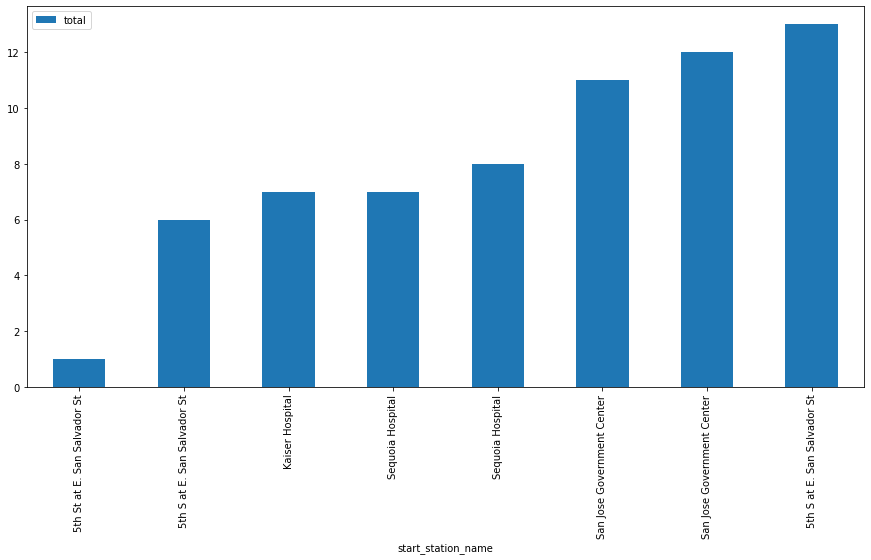

In [574]:
my_panda_data_frame.plot.bar(x="start_station_name", figsize=(15, 7))

## **<u>Recomendation 2:</u>** _Attract more recreational riders by providing weekend deals (e.g. All day pass)_   
The datatable below as well as the plot enable us to see that the distribution of trips through out the week. Based on the table we can see that there is a substantial gab between trips taken during the week as compared to the weekend. It's possible to boost weekend profits by offering an all day pass. 

  

In [534]:
! bq query --use_legacy_sql=FALSE --format=csv  'SELECT  subscriber_type, day_of_week, COUNT(*) AS total_trips, FROM (SELECT subscriber_type, start_date, EXTRACT(DAYOFWEEK FROM start_date) AS day_of_week FROM 'bigquery-public-data.san_francisco.bikeshare_trips') GROUP BY subscriber_type, day_of_week ORDER BY day_of_week'> customer.csv

Waiting on bqjob_r4e8be366db0fc66e_0000017c4f723b76_1 ... (0s) Current status: DONE   


### Table 2: Daily Distribution of Total Trips Taken By Customer type

In [571]:
customer_trips = pd.read_csv('customer.csv')
customer_trips

,subscriber_type,day_of_week,total_trips
0,Customer,1,25908
1,Subscriber,1,25467
2,Subscriber,2,154795
3,Customer,2,15142
4,Customer,3,14737
5,Subscriber,3,169668
6,Subscriber,4,165530
7,Customer,4,15237
8,Customer,5,16612
9,Subscriber,5,160296


### Figure 2: Customer vs Subscriber Trip Frequency by Week. 

The chart below enables a better visualization of the trips taken throughout the week. We can easily see the drop off on the 1st day of the week (Sunday) and 7th day of the week (Saturday). Because commuter travel happens on the weekday, the demand for bicycles is low, however we can cater to the recreational riders

<AxesSubplot:xlabel='day_of_week'>

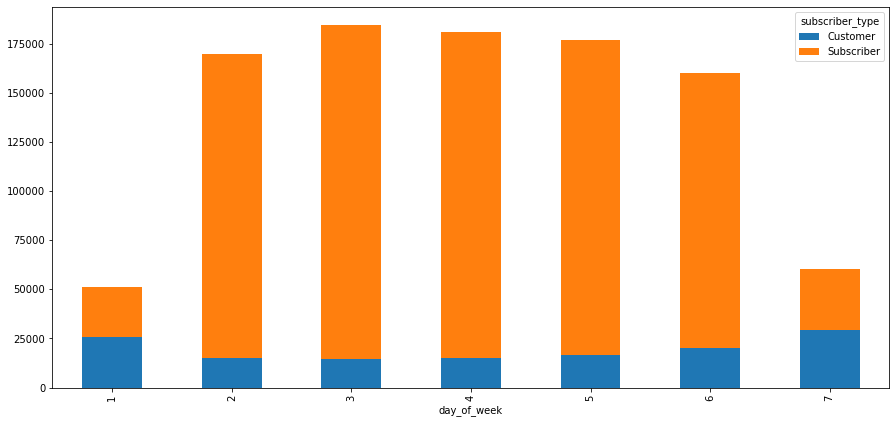

In [572]:
pivot_table = customer_trips.pivot(index="day_of_week", columns="subscriber_type", values="total_trips")
pivot_table.plot(kind="bar", stacked=True, figsize=(15, 7))

In [506]:
%%bigquery my_panda_data_frame

SELECT start_station_name, end_station_name,
   EXTRACT(DAYOFWEEK FROM start_date) AS day_of_week, subscriber_type,
   EXTRACT(HOUR FROM start_date) AS hour_of_day,
   ROUND(AVG(duration_sec/60),2) AS avg_duration_min,
   COUNT(*) as trip_freq,
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = "Customer"
GROUP BY start_station_name, end_station_name, day_of_week, hour_of_day, subscriber_type
ORDER BY trip_freq DESC LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:00<00:00,  5.60rows/s]


### Weekend Recreational Trips

The table below are the top 5 trips taken by the customers (non-subscribers). According to the data, we see that the average duration ranges from 27 minutes to approximately 60 min and between the 12th and 14th hour of the day which is after the lunch hour. 

In [507]:
my_panda_data_frame

,start_station_name,end_station_name,day_of_week,subscriber_type,hour_of_day,avg_duration_min,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,7,Customer,12,53.94,131
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,1,Customer,12,34.36,126
2,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,7,Customer,13,27.45,122
3,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,1,Customer,14,35.49,114
4,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,7,Customer,14,58.50,109


# Conclusion

In summary, we established our primary customer base are the weekday commuters who subscribe to the 30 day payment model. These customers typically likely ride the ferry boat and take the cal train in San Francisco. The area where our business performace is not doing so well are the docking stations in San Jose. With bikeshare services becoming more competitive, we must do what we can to secure and gain market share in this sector by converting our recreational customers to subscribers which can be done by offering special weekend rates such as an all day pass. 